#Implementation of LSTM with RNN on SPAM.CSV

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('spam.csv')
df.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.columns

Index(['label', 'sms'], dtype='object')

##Preprocessing

In [21]:
df.isnull().sum()

label    0
sms      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='count', ylabel='label'>

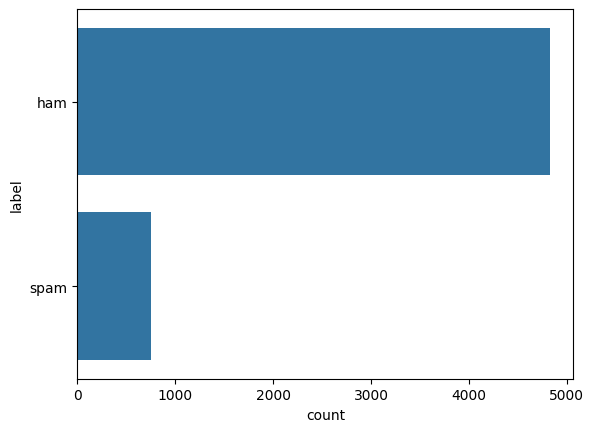

In [24]:
sns.countplot(df["label"])

In [25]:
import collections

15585


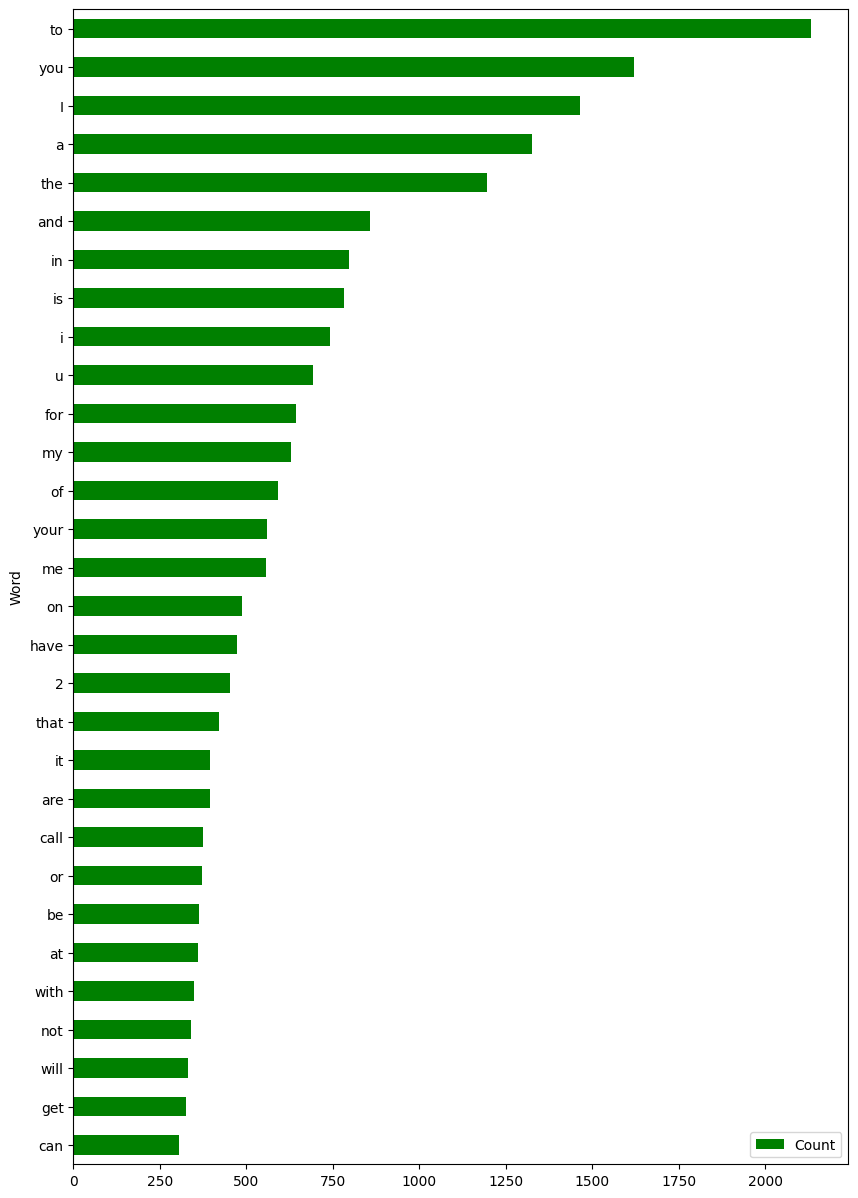

In [49]:
def word_count_plot(data):
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     print(len(word_counter))
     most_count = word_counter.most_common(30)
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(df["sms"])

## Tokenization


In [27]:
df['target'] = df['label'].map( {'spam':1, 'ham':0 })

In [28]:
df.head()

,label,sms,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
df_train = df.sample(frac=.8, random_state=11)
df_test = df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(4458, 3) (1114, 3)


In [30]:
y_train = df_train['target'].values
y_test = df_test['target'].values
y_test.shape

(1114,)

In [31]:
X_train = df_train['sms'].values
X_test = df_test['sms'].values

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_dict = tokenizer.index_word
# print(len(word_dict))
# print(word_dict)

# for key in word_dict.keys():
#    print(key, word_dict[key])

In [34]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print(X_train_seq[:5])
print(df_train.iloc[0,:])
for el in X_train_seq[0]:
    print(word_dict[el], end=' ')

[[172, 211, 12, 13, 87, 92, 45, 8, 32, 3799, 231, 9, 7, 86, 6, 81, 1020, 5, 3800, 7, 1999, 11, 635, 241, 21, 25, 436, 928, 1110, 178, 131, 206, 929, 2564, 23, 1, 154, 80, 2, 110, 82, 48, 2, 135, 11, 929, 227, 98, 1639], [257, 307, 2, 1426, 2565, 6, 33, 30, 1245, 1246, 15, 49, 5, 337, 709, 7, 1427, 1428, 581, 68, 34, 2000, 88, 2, 2001], [22, 636, 13, 283, 211, 7, 26, 3, 17, 94, 1429, 67], [13, 296, 2, 30, 18, 4, 2002, 1640, 491, 16, 22, 1247, 37, 930, 258, 183, 931, 671, 401, 349, 1111, 1112, 1113, 1114, 1021, 8, 4, 553, 360, 16], [99, 203, 166, 1, 184, 3, 117, 3801, 148, 2, 52, 48, 3802, 22]]
label                                                   ham
sms       Thanks again for your reply today. When is ur ...
target                                                    0
Name: 4460, dtype: object
thanks again for your reply today when is ur visa coming in and r u still buying the gucci and bags my sister things are not easy uncle john also has his own bills so i really need to think abou

In [35]:
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')
X_train_pad[:5]
X_train_pad.shape

(4458, 20)

In [36]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [50]:
laenge_pads = 20
anz_woerter = 15585

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=anz_woerter+1, output_dim=20, input_length=laenge_pads))
lstm_model.add(LSTM(400))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 20)            311720    
                                                                 
 lstm_1 (LSTM)               (None, 400)               673600    
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 985721 (3.76 MB)
Trainable params: 985721 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
70/70 [==============================] - 12s 145ms/step - loss: 0.2069 - accuracy: 0.9302 - val_loss: 0.0764 - val_accuracy: 0.9785
Epoch 2/5
70/70 [==============================] - 5s 73ms/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.1462 - val_accuracy: 0.9758
Epoch 3/5
70/70 [==============================] - 4s 54ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.1061 - val_accuracy: 0.9847
Epoch 4/5
70/70 [==============================] - 2s 30ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0944 - val_accuracy: 0.9829
Epoch 5/5
70/70 [==============================] - 2s 23ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1265 - val_accuracy: 0.9856


In [52]:
sms_test = ['Hi Paul, would you come around tonight']
sms_seq = tokenizer.texts_to_sequences(sms_test)

sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')
tokenizer.index_word
sms_pad
lstm_model.predict(sms_pad)

1/1 [==============================] - 0s 361ms/step


array([[1.0299707e-06]], dtype=float32)

In [53]:
sms_test = ['Free SMS service for anyone']
sms_seq = tokenizer.texts_to_sequences(sms_test)

sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')
tokenizer.index_word
sms_pad
lstm_model.predict(sms_pad)

1/1 [==============================] - 0s 18ms/step


array([[0.9999721]], dtype=float32)

In [41]:
y_pred=lstm_model.predict(X_test_pad)
y_pred=(y_pred>0.5)

35/35 [==============================] - 0s 3ms/step


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:98.47%


array([[958,   5],
       [ 12, 139]])

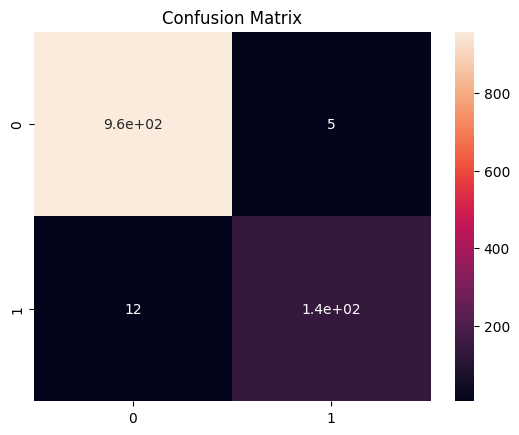

In [43]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
cm